In [5]:
import os
import json
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

In [6]:
path_252 = '/home/boyeon/Desktop/orion/230531_252/annotations/annotations.json'
path_322 = '/home/boyeon/Desktop/orion/230823_322/annotations/annotations.json'
path_1369 = '/home/boyeon/Desktop/orion/230821_1369/annotations/annotations.json'


with open(path_252, 'r') as f:
    data1 = json.load(f)

with open(path_322, 'r') as f:
    data2 = json.load(f)
    
with open(path_1369, 'r') as f:
    data3 = json.load(f)

In [7]:
def make_df(data): 
    annotation_df = pd.DataFrame(data['annotations']).drop(['id'], axis=1)
    images_df = pd.DataFrame(data['images'])
    categories_df = pd.DataFrame(data['categories'])
    merged = pd.merge(images_df, annotation_df, how='left', left_on='id', right_on='image_id').drop(['id'], axis=1)
    df = pd.merge(merged, categories_df, how='left', left_on='category_id', right_on='id')
    df['bbox'] = df['bbox'].apply(tuple)
    df = df.drop_duplicates()
    df['bbox'] = df['bbox'].apply(list)
    df = df[['image_id', 'file_name', 'category_id', 'name', 'bbox', 'area', 'width', 'height']]
    return df

In [8]:
df1 = make_df(data1)
df1['dataset_type'] = '252'
df1

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[361, 255, 556, 319]",177364,3000,4000,252
2,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[922, 274, 539, 309]",166551,3000,4000,252
4,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[982, 2224, 449, 399]",179151,3000,4000,252
6,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1466, 2224, 439, 384]",168576,3000,4000,252
8,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1915, 2240, 437, 380]",166060,3000,4000,252
...,...,...,...,...,...,...,...,...,...
177186,9306075,KakaoTalk_20221216_153535831_16.jpg,103,크래커(80g),"[710, 617, 190, 43]",8170,1080,1440,252
177188,9306075,KakaoTalk_20221216_153535831_16.jpg,218,초코픽(45g),"[397, 1349, 48, 47]",2256,1080,1440,252
177190,9306075,KakaoTalk_20221216_153535831_16.jpg,218,초코픽(45g),"[445, 1351, 46, 45]",2070,1080,1440,252
177192,9306075,KakaoTalk_20221216_153535831_16.jpg,218,초코픽(45g),"[510, 1343, 35, 40]",1400,1080,1440,252


In [9]:
df2 = make_df(data2)
df2['dataset_type'] = '322'
df2.head()

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,0,00000.jpg,0,알수없음,"[0, 0, 522, 428]",223416,3000,4000,322
1,0,00000.jpg,0,알수없음,"[398, 157, 443, 609]",269787,3000,4000,322
2,0,00000.jpg,210,농심 쫄병스낵 안성탕면맛 77*3,"[1726, 197, 327, 288]",94176,3000,4000,322
3,0,00000.jpg,222,삼양 별뽀빠이 72g*4개입,"[2084, 203, 347, 316]",109652,3000,4000,322
4,0,00000.jpg,0,알수없음,"[840, 244, 403, 505]",203515,3000,4000,322


In [10]:
df3 = make_df(data3)
df3['dataset_type'] = '1369'
df3.head()

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,0,00000.jpg,484,레이즈 체다사워크림감자칩184.2g,"[0, 0, 522, 428]",223416,3000,4000,1369
1,0,00000.jpg,479,농심 딸기 바나나킥 60g,"[398, 157, 443, 609]",269787,3000,4000,1369
2,0,00000.jpg,300,농심 쫄병스낵 안성탕면맛 77*3,"[1726, 197, 327, 288]",94176,3000,4000,1369
3,0,00000.jpg,334,삼양 별뽀빠이 72g*4개입,"[2084, 203, 347, 316]",109652,3000,4000,1369
4,0,00000.jpg,480,농심 민초 바나나킥 60g,"[840, 244, 403, 505]",203515,3000,4000,1369


In [11]:
total_df = pd.concat([df1,df2,df3])

In [12]:
total_df

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[361, 255, 556, 319]",177364,3000,4000,252
2,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[922, 274, 539, 309]",166551,3000,4000,252
4,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[982, 2224, 449, 399]",179151,3000,4000,252
6,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1466, 2224, 439, 384]",168576,3000,4000,252
8,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1915, 2240, 437, 380]",166060,3000,4000,252
...,...,...,...,...,...,...,...,...,...
126361,1960,02084.jpg,209,해태 칼바 카야버터숏브레드(7입)175g,"[2328, 3189, 243, 177]",43011,2622,3970,1369
126362,1960,02084.jpg,70,롯데 제크오리지널300g,"[1407, 3193, 332, 98]",32536,2622,3970,1369
126363,1960,02084.jpg,70,롯데 제크오리지널300g,"[1402, 3291, 332, 94]",31208,2622,3970,1369
126364,1960,02084.jpg,70,롯데 제크오리지널300g,"[1744, 3291, 327, 94]",30738,2622,3970,1369


Text(0.5, 1.0, 'The number of images')

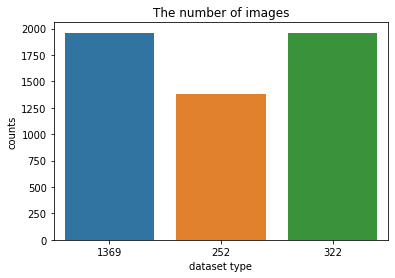

In [320]:
df = total_df.groupby('dataset_type')['image_id'].nunique().to_frame().reset_index()
df['total count'] = [1961,1386,2076]
order = [252,322,1369]
ax1 = sns.barplot(x=df['dataset_type'], y=df['image_id'])
plt.xlabel('dataset type')
plt.ylabel('counts')
plt.title('The number of images')

In [297]:
# dataset에 들어있는 전체 이미지 개수 
[252, 322, 1369]
[1386, 2076, 1961]

[1386, 2076, 1961]

In [298]:
pd.crosstab(total_df['dataset_type'], total_df['category_id'], margins=True)

category_id,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,All
dataset_type,,,,,,,,,,,,,,,,,,,,,
1369,1506,245,249,14,54,36,61,28,22,54,...,3,3,2,2,6,8,2,3,6,126366
252,950,438,426,26,108,68,116,46,44,106,...,0,0,0,0,0,0,0,0,0,177196
322,19923,245,249,81,75,100,70,76,102,165,...,0,0,0,0,0,0,0,0,0,126366
All,22379,928,924,121,237,204,247,150,168,325,...,3,3,2,2,6,8,2,3,6,429928


In [321]:
df['new'] = df['total count'] - df['image_id']
df

,dataset_type,image_id,total count,new
0,1369,1961,1961,0
1,252,1385,1386,1
2,322,1961,2076,115


# total images, annotation images

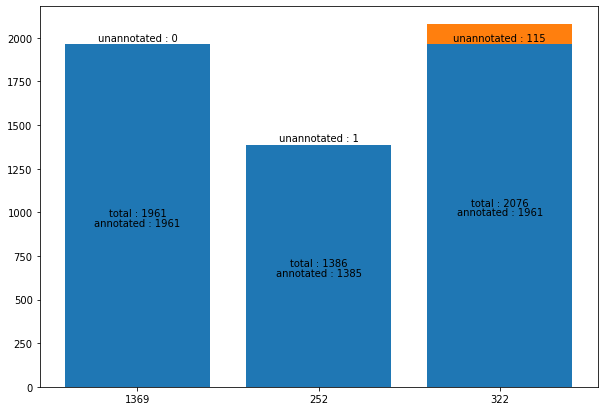

In [597]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.bar(df['dataset_type'], df['image_id'])
ax.bar(df['dataset_type'], df['new'], bottom = df['image_id'])

for i in range(len(df)):
    total_count = df['total count'][i]
    ann_count = df['image_id'][i]
    ax.text(df['dataset_type'][i], df['total count'][i] / 2, 'total : ' + str(df['total count'][i]), fontsize = 10, horizontalalignment='center', color = 'black')
    ax.text(df['dataset_type'][i], df['image_id'][i] + 20 , 'unannotated : '+ str(df['new'][i]), fontsize = 10, horizontalalignment='center', color = 'black')
    ax.text(df['dataset_type'][i], df['total count'][i] / 2 - 57  , 'annotated : '+ str(df['image_id'][i]), fontsize = 10, horizontalalignment='center', color = 'black')
plt.show()

In [598]:
df

,dataset_type,image_id,total count,new
0,1369,1961,1961,0
1,252,1385,1386,1
2,322,1961,2076,115


In [599]:
# # 전체 이미지 수 : 1,385
# train : 1,108(80%), valid : 277 (20%)
# 전체 객체 수 : 88,598
# 카테고리 수 : 252
# 객체 길이 (픽셀 수)
# 최대 너비 : 4,624
# 최소 너비 : 1,180
# 평균 너비 : 3,378
# 최대 높이 : 3,184
# 최소 높이 : 636
# 평균 높이 : 2,304


In [600]:
a = total_df.groupby(['dataset_type', 'file_name'])['bbox'].count().to_frame()
a.groupby('dataset_type').max()

,bbox
dataset_type,
1369,198
252,198
322,198


In [601]:
df3.groupby('file_name')['bbox'].count().to_frame().sort_values('bbox')

,bbox
file_name,
00490.jpg,12
00442.jpg,13
00430.jpg,20
00463.jpg,21
01733.jpg,21
...,...
00997.jpg,184
00742.jpg,185
01388.jpg,195


In [602]:
total_df.groupby('dataset_type')['name'].apply(str)

dataset_type
1369    0            레이즈 체다사워크림감자칩184.2g\n1           ...
252     0                     해당없음\n2                 ...
322     0                           알수없음\n1           ...
Name: name, dtype: object

In [603]:
df1['name'].value_counts()

해당없음                  8976
에이스4번들(372g)          1989
초코송이(36G*2번들)         1233
카스타드2번들20입(460g)      1045
국희땅콩샌드12입(372g)        985
                      ... 
감자칩사워크림&어니언(160g)        4
포키극세8입(352g)             4
커피씬비스킷(120g)             2
홈런볼커스타드크림4번들(164g)       2
트리플초콜릿쿠키(150g)           2
Name: name, Length: 230, dtype: int64

In [604]:
# total_df.set_index('dataset_type')
total_df

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[361, 255, 556, 319]",177364,3000,4000,252
2,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[922, 274, 539, 309]",166551,3000,4000,252
4,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[982, 2224, 449, 399]",179151,3000,4000,252
6,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1466, 2224, 439, 384]",168576,3000,4000,252
8,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1915, 2240, 437, 380]",166060,3000,4000,252
...,...,...,...,...,...,...,...,...,...
126361,1960,02084.jpg,209,해태 칼바 카야버터숏브레드(7입)175g,"[2328, 3189, 243, 177]",43011,2622,3970,1369
126362,1960,02084.jpg,70,롯데 제크오리지널300g,"[1407, 3193, 332, 98]",32536,2622,3970,1369
126363,1960,02084.jpg,70,롯데 제크오리지널300g,"[1402, 3291, 332, 94]",31208,2622,3970,1369
126364,1960,02084.jpg,70,롯데 제크오리지널300g,"[1744, 3291, 327, 94]",30738,2622,3970,1369


In [605]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [62]:
a = total_df.groupby(['dataset_type','name']).count()
# a.loc[('1369')].sort_values('image_id', ).describe()
# sns.barplot(x=a.index, y=a['image_id'])
temp = a.loc[('1369')].sort_values('image_id', ascending=False )
temp =temp.reset_index()

temp =temp[['name','image_id']]
temp.rename(columns={'image_id': 'count'}, inplace=True)

# sns.barplot(x=temp['name'][-5:], y=temp['image_id'][-5:])
# plt.show()

In [63]:
temp

,name,count
0,해태 에이스4번들372g,1975
1,알수없음,1506
2,오리온 초코송이36G*2번들,1371
3,크라운 국희땅콩샌드 372g(12입),1085
4,롯데 카스타드 2번들 460G(20입),1050
...,...,...
1353,삼양 쌀로 별뽀빠이 강정 100g,1
1354,크라운 딸기파이 10봉입 300g,1
1355,마너 웨이퍼 헤이즐넛 나폴리타너 75g,1
1356,캐치티니핑 꾸래핑의 새콤달콤 사워 젤리 50g,1


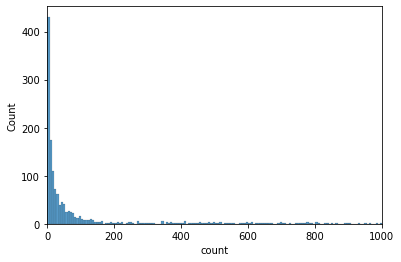

In [88]:
plt.subplot()
# sns.barplot(y=temp['name'], x=temp['count'])
sns.histplot(x=temp['count'], bins=temp['count'].nunique())
plt.xlim(0,1000)
plt.show()


In [19]:
temp.describe()

,count
count,1358.000000
mean,93.053019
std,196.616371
min,1.000000
25%,5.000000
50%,18.000000
75%,66.000000
max,1975.000000


In [671]:
b = total_df.groupby('name').count().sort_values('image_id', ascending=False).head().reset_index()
b = b[['name','image_id']]
b.rename(columns={'image_id': 'count'}, inplace=True)
b

,name,count
0,알수없음,21904
1,해당없음,10194
2,해태 에이스4번들372g,3950
3,오리온 초코송이36G*2번들,2742
4,크라운 국희땅콩샌드 372g(12입),2170


In [17]:
total_df.sort_values('area', ascending=False)

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
87265,1338,01462.jpg,0,알수없음,"[0, 175, 324, 3857]",1249668,1960,4032,322
87265,1338,01462.jpg,0,알수없음,"[0, 175, 324, 3857]",1249668,1960,4032,1369
87206,1336,01460.jpg,0,알수없음,"[188, 3077, 1665, 610]",1015650,1960,4032,1369
87206,1336,01460.jpg,0,알수없음,"[188, 3077, 1665, 610]",1015650,1960,4032,322
85462,9305762,KakaoTalk_20221216_093838075_12.jpg,76,카스타드2번들20입(460g),"[777, 297, 994, 766]",761404,2784,4624,252
...,...,...,...,...,...,...,...,...,...
83420,1284,01408.jpg,168,해태 에이스4번들372g,"[1476, 678, 20, 39]",780,1496,1496,322
83738,1287,01411.jpg,0,알수없음,"[1475, 704, 21, 37]",777,1496,1496,322
83738,1287,01411.jpg,779,롯샌 파인애플 105g,"[1475, 704, 21, 37]",777,1496,1496,1369
102246,9305925,KakaoTalk_20221216_122653971_06.jpg,79,누드크림치즈빼빼로(46g),"[1, 681, 44, 15]",660,961,1280,252


In [105]:
total_df

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[361, 255, 556, 319]",177364,3000,4000,252
2,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[922, 274, 539, 309]",166551,3000,4000,252
4,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[982, 2224, 449, 399]",179151,3000,4000,252
6,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1466, 2224, 439, 384]",168576,3000,4000,252
8,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1915, 2240, 437, 380]",166060,3000,4000,252
...,...,...,...,...,...,...,...,...,...
126361,1960,02084.jpg,209,해태 칼바 카야버터숏브레드(7입)175g,"[2328, 3189, 243, 177]",43011,2622,3970,1369
126362,1960,02084.jpg,70,롯데 제크오리지널300g,"[1407, 3193, 332, 98]",32536,2622,3970,1369
126363,1960,02084.jpg,70,롯데 제크오리지널300g,"[1402, 3291, 332, 94]",31208,2622,3970,1369
126364,1960,02084.jpg,70,롯데 제크오리지널300g,"[1744, 3291, 327, 94]",30738,2622,3970,1369


In [106]:
sns.barplot(x=total_df['category_id'], y=total_df.count('category_id'))

AttributeError: module 'seaborn' has no attribute 'barbplot'

In [115]:
a = total_df.groupby(['name']).count()
a

,image_id,file_name,category_id,bbox,area,width,height,dataset_type
name,,,,,,,,
Only Price 구운 마늘&양파 100G,35,35,35,35,35,35,35,35
Only Price 인절미스낵 80g,41,41,41,41,41,41,41,41
빙빙 초코 6입 53.4g,17,17,17,17,17,17,17,17
피코크 초코에너지바 440g,2,2,2,2,2,2,2,2
&GO 12개입 52g,384,384,384,384,384,384,384,384
...,...,...,...,...,...,...,...,...
후렌치파이사과(15입),622,622,622,622,622,622,622,622
후지야 호로루 까망베르치즈쿠키 84g,29,29,29,29,29,29,29,29
후지야 호로루 버터쿠키 84g,26,26,26,26,26,26,26,26


In [122]:
df2

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,0,00000.jpg,0,알수없음,"[0, 0, 522, 428]",223416,3000,4000,322
1,0,00000.jpg,0,알수없음,"[398, 157, 443, 609]",269787,3000,4000,322
2,0,00000.jpg,210,농심 쫄병스낵 안성탕면맛 77*3,"[1726, 197, 327, 288]",94176,3000,4000,322
3,0,00000.jpg,222,삼양 별뽀빠이 72g*4개입,"[2084, 203, 347, 316]",109652,3000,4000,322
4,0,00000.jpg,0,알수없음,"[840, 244, 403, 505]",203515,3000,4000,322
...,...,...,...,...,...,...,...,...,...
126361,1960,02084.jpg,161,해태 칼바 카야버터숏브레드(7입)175g,"[2328, 3189, 243, 177]",43011,2622,3970,322
126362,1960,02084.jpg,37,롯데 제크오리지널300g,"[1407, 3193, 332, 98]",32536,2622,3970,322
126363,1960,02084.jpg,37,롯데 제크오리지널300g,"[1402, 3291, 332, 94]",31208,2622,3970,322
126364,1960,02084.jpg,37,롯데 제크오리지널300g,"[1744, 3291, 327, 94]",30738,2622,3970,322


In [120]:
df3

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,0,00000.jpg,484,레이즈 체다사워크림감자칩184.2g,"[0, 0, 522, 428]",223416,3000,4000,1369
1,0,00000.jpg,479,농심 딸기 바나나킥 60g,"[398, 157, 443, 609]",269787,3000,4000,1369
2,0,00000.jpg,300,농심 쫄병스낵 안성탕면맛 77*3,"[1726, 197, 327, 288]",94176,3000,4000,1369
3,0,00000.jpg,334,삼양 별뽀빠이 72g*4개입,"[2084, 203, 347, 316]",109652,3000,4000,1369
4,0,00000.jpg,480,농심 민초 바나나킥 60g,"[840, 244, 403, 505]",203515,3000,4000,1369
...,...,...,...,...,...,...,...,...,...
126361,1960,02084.jpg,209,해태 칼바 카야버터숏브레드(7입)175g,"[2328, 3189, 243, 177]",43011,2622,3970,1369
126362,1960,02084.jpg,70,롯데 제크오리지널300g,"[1407, 3193, 332, 98]",32536,2622,3970,1369
126363,1960,02084.jpg,70,롯데 제크오리지널300g,"[1402, 3291, 332, 94]",31208,2622,3970,1369
126364,1960,02084.jpg,70,롯데 제크오리지널300g,"[1744, 3291, 327, 94]",30738,2622,3970,1369


In [123]:
total_df

,image_id,file_name,category_id,name,bbox,area,width,height,dataset_type
0,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[361, 255, 556, 319]",177364,3000,4000,252
2,9304793,KakaoTalk_20221212_103846500.jpg,251,해당없음,"[922, 274, 539, 309]",166551,3000,4000,252
4,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[982, 2224, 449, 399]",179151,3000,4000,252
6,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1466, 2224, 439, 384]",168576,3000,4000,252
8,9304793,KakaoTalk_20221212_103846500.jpg,138,카스타드2번들24입(552g),"[1915, 2240, 437, 380]",166060,3000,4000,252
...,...,...,...,...,...,...,...,...,...
126361,1960,02084.jpg,209,해태 칼바 카야버터숏브레드(7입)175g,"[2328, 3189, 243, 177]",43011,2622,3970,1369
126362,1960,02084.jpg,70,롯데 제크오리지널300g,"[1407, 3193, 332, 98]",32536,2622,3970,1369
126363,1960,02084.jpg,70,롯데 제크오리지널300g,"[1402, 3291, 332, 94]",31208,2622,3970,1369
126364,1960,02084.jpg,70,롯데 제크오리지널300g,"[1744, 3291, 327, 94]",30738,2622,3970,1369
